## Import

In [84]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import iqr


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DataFrame

In [85]:
df_web = pd.read_excel("web.xlsx")
df_erp = pd.read_excel("erp.xlsx")
df_liaison = pd.read_excel("liaison.xlsx")

df_web_origin, df_erp_origin, df_liaison_origin = df_web, df_erp, df_liaison

C:\Users\Utilisateur\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [86]:
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


## Cleanning

### Cleanning rows and columns (duplicate / NaN)

In [87]:
df_drop_row = df_web.dropna(axis=0, how='all')
df_drop_column = df_drop_row.dropna(axis=1, how = 'all')
df_web_clean = df_drop_column.drop_duplicates(subset=['sku'])
print(df_web_clean.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            715 non-null    int64         
 2   downloadable       715 non-null    int64         
 3   rating_count       715 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_status        714 non-null    object        
 13  comment_status     714 non-null    object        
 14  ping_statu

In [88]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


### Clean the NaN rows to the liaison DataFrame

In [89]:
df_liaison_cleaned = df_liaison.dropna(axis=0, how='any') 
df_liaison_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


### Merge the DataFrame

In [90]:
df_first_merge = pd.merge(df_erp, df_liaison_cleaned, left_on = 'product_id', right_on = 'product_id', how = "inner")
df_full = pd.merge(df_first_merge, df_web_clean, left_on = 'id_web', right_on = 'sku', how = "inner")

In [91]:
df_full.info()
df_full.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            714 non-null    int64         
 8   downloadable       714 non-null    int64         
 9   rating_count       714 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date 

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,15298,0,0,0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,15296,0,0,0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,15300,0,0,0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,19814,0,0,0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,19815,0,0,0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
5,4040,1,34.3,0,outofstock,15303,15303,0,0,0,...,closed,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
6,4041,1,32.7,15,instock,14975,14975,0,0,0,...,closed,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
7,4042,1,31.2,34,instock,16042,16042,0,0,0,...,closed,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
8,4043,1,60.0,12,instock,14980,14980,0,0,0,...,closed,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
9,4045,1,42.6,66,instock,16041,16041,0,0,0,...,closed,pierre-gaillard-cote-rotie-2018,2020-08-03 09:55:03,2020-08-03 07:55:03,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0


In [92]:
df_full.drop_duplicates(subset=['stock_status'])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            714 non-null    int64         
 8   downloadable       714 non-null    int64         
 9   rating_count       714 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date 

### Add the column year

In [93]:
df_full['year']= df_full["post_title"].str[-4:]

In [94]:

print(df_full.info())
print(df_full.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            714 non-null    int64         
 8   downloadable       714 non-null    int64         
 9   rating_count       714 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date 

### Clean the columns with NaN

In [95]:

df_cleaned = df_full.dropna(axis=1, how = 'all')

In [96]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            714 non-null    int64         
 8   downloadable       714 non-null    int64         
 9   rating_count       714 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date 

### Clean the NaN title

In [97]:
df_cleaned_title = df_cleaned.drop(df_cleaned[df_cleaned['post_title']=='nan'].index)
df_cleaned_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            714 non-null    int64         
 8   downloadable       714 non-null    int64         
 9   rating_count       714 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date 

### Create a DataFrame with the price and total sales

In [98]:
df_out = df_cleaned[['price' , 'total_sales']]
df_out

,price,total_sales
0,24.2,6.0
1,34.3,0.0
2,20.8,0.0
3,14.1,3.0
4,46.0,0.0
...,...,...
709,8.4,5.0
710,27.5,0.0
711,69.0,0.0
712,54.8,0.0


## Analysis

### Add a turn_over column

In [100]:
df_cleaned['turn_over'] = df_cleaned['price'] * df_cleaned['total_sales']

In [101]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   id_web             714 non-null    object        
 6   sku                714 non-null    object        
 7   virtual            714 non-null    int64         
 8   downloadable       714 non-null    int64         
 9   rating_count       714 non-null    int64         
 10  average_rating     714 non-null    float64       
 11  total_sales        714 non-null    float64       
 12  tax_status         714 non-null    object        
 13  post_author        714 non-null    float64       
 14  post_date 

### Calculate the total turn over

In [102]:
total_turn_over = df_cleaned['turn_over'].sum()

In [103]:
total_turn_over

70568.6

### See the cloud plot of the price and total_sales

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='total_sales'>

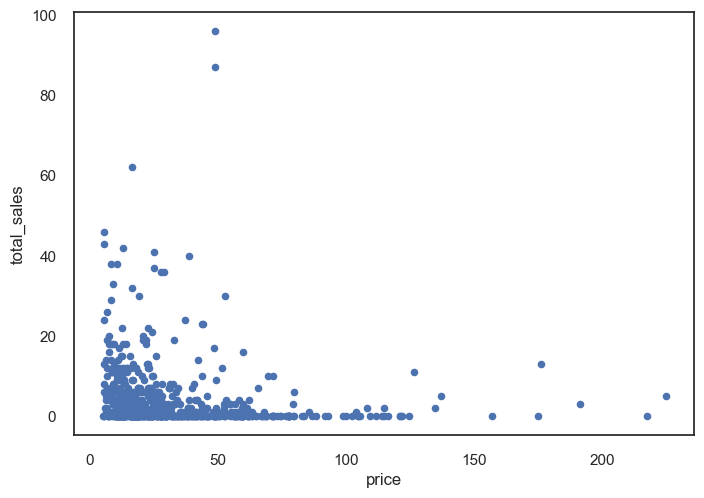

In [104]:
df_out.plot.scatter(x='price', y='total_sales')

## Outliers

<AxesSubplot:xlabel='price'>

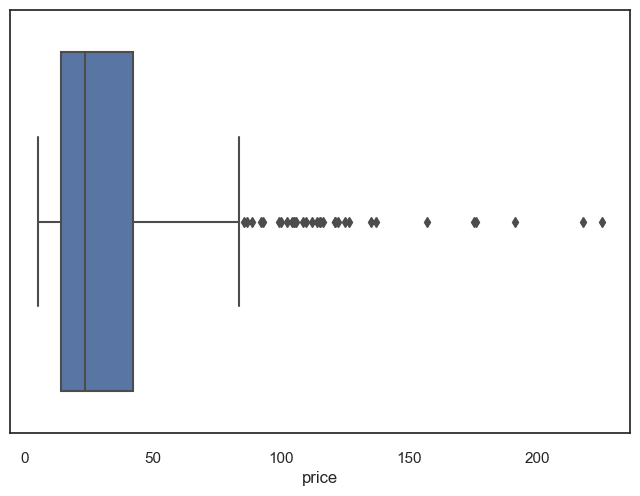

In [83]:
sns.boxplot(x='price', data= df_out)

### Calculate the Z-score

In [29]:
df_cleaned['z_score']= stats.zscore(df_cleaned['price'])

### Recover the outliers

In [30]:
outliers = df_cleaned.query('-2 <= z_score >= 2')
outliers.info()
outliers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 63 to 657
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         30 non-null     int64         
 1   onsale_web         30 non-null     int64         
 2   price              30 non-null     float64       
 3   stock_quantity     30 non-null     int64         
 4   stock_status       30 non-null     object        
 5   id_web             30 non-null     object        
 6   sku                30 non-null     object        
 7   virtual            30 non-null     int64         
 8   downloadable       30 non-null     int64         
 9   rating_count       30 non-null     int64         
 10  average_rating     30 non-null     float64       
 11  total_sales        30 non-null     float64       
 12  tax_status         30 non-null     object        
 13  post_author        30 non-null     float64       
 14  post_date 

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,year,turn_over,z_score
63,4115,1,100.0,11,instock,15382,15382,0,0,0,...,2020-02-08 11:45:02,2020-02-08 10:45:02,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,0.0,2017,0.0,2.429087
65,4132,1,88.4,5,instock,11668,11668,0,0,0,...,2020-02-20 09:55:02,2020-02-20 08:55:02,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,0.0,2012,0.0,2.011686
199,4352,1,225.0,0,outofstock,15940,15940,0,0,0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,0.0,2008,1125.0,6.926939
201,4355,1,126.5,2,instock,12589,12589,0,0,0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,0.0,oirs,1391.5,3.382632
218,4402,1,176.0,8,instock,3510,3510,0,0,0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,0.0,P XO,2288.0,5.163781


### Plot the outliers 

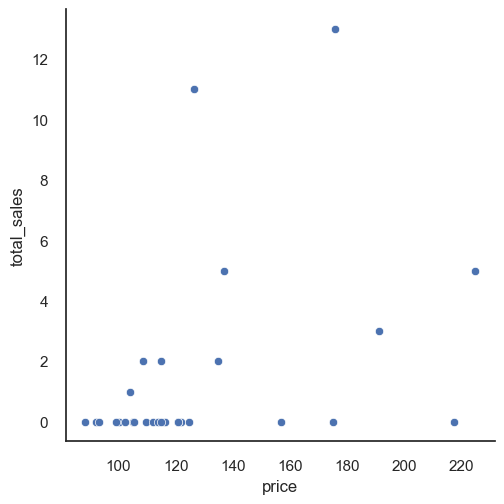

In [82]:

sns.relplot(data= outliers, x= 'price', y = 'total_sales')


## Kmeans

In [32]:
df_pt = df_cleaned[['price' ,'total_sales']]
df_pt

,price,total_sales
0,24.2,6.0
1,34.3,0.0
2,20.8,0.0
3,14.1,3.0
4,46.0,0.0
...,...,...
709,8.4,5.0
710,27.5,0.0
711,69.0,0.0
712,54.8,0.0


In [33]:
df_pt_row = df_pt.dropna(axis=0, how='any')
df_pt_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        714 non-null    float64
 1   total_sales  714 non-null    float64
dtypes: float64(2)
memory usage: 16.7 KB


In [34]:
X = df_pt_row
X_train, X_test = train_test_split(X, test_size=0.33, random_state=34)
kmeans = KMeans(n_clusters=4, random_state=34).fit(X_train)
X_test['cluster'] = kmeans.predict(X_test)

<ipython-input-34-0a291c44d4d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cluster'] = kmeans.predict(X_test)


In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 686 to 703
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        236 non-null    float64
 1   total_sales  236 non-null    float64
 2   cluster      236 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 6.5 KB


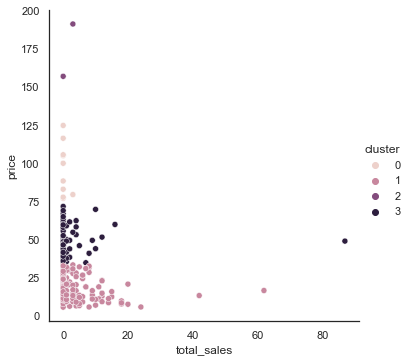

In [36]:
sns.set_theme(style="white")
sns.relplot( data= X_test, x= 'total_sales', y='price', hue= "cluster")


Predicat = Les clusters sont fait en fonction de la rentabilité (price * total_sales)
cluster 0 < 2 < 1 < 3

In [ ]:
x_clust_0 = X_test.query('cluster == 0')
x_clust_1 = X_test.query('cluster == 1')
x_clust_2 = X_test.query('cluster == 2')
x_clust_3 = X_test.query('cluster == 3')

In [ ]:
x_clust_0['turn_over'] = x_clust_0['price'] * x_clust_0['total_sales']
x_clust_1['turn_over'] = x_clust_1['price'] * x_clust_1['total_sales']
x_clust_2['turn_over'] = x_clust_2['price'] * x_clust_2['total_sales']
x_clust_3['turn_over'] = x_clust_3['price'] * x_clust_3['total_sales']

In [75]:
x_clust_0_to = x_clust_0['turn_over'].mean()
x_clust_1_to = x_clust_1['turn_over'].mean()
x_clust_2_to = x_clust_2['turn_over'].mean()
x_clust_3_to = x_clust_3['turn_over'].mean()
print( "La moyenne du chiffre d'affaire du cluster 0 est : " , x_clust_0_to, "\n", 
 "La moyenne du chiffre d'affaire du cluster 1  est : ", x_clust_1_to, "\n", 
  "La moyenne du chiffre d'affaire du cluster 2  est : ", x_clust_2_to,"\n", 
   "La moyenne du chiffre d'affaire du cluster 3  est : " , x_clust_3_to)

La moyenne du chiffre d'affaire du cluster 0 est :  23.85 
 La moyenne du chiffre d'affaire du cluster 1  est :  63.199999999999996 
 La moyenne du chiffre d'affaire du cluster 2  est :  286.95000000000005 
 La moyenne du chiffre d'affaire du cluster 3  est :  140.35428571428574


In [76]:
x_clust_0_p = x_clust_0['price'].mean()
x_clust_1_p = x_clust_1['price'].mean()
x_clust_2_p = x_clust_2['price'].mean()
x_clust_3_p = x_clust_3['price'].mean()
print( "La moyenne du prix du cluster 0 est : " , x_clust_0_p, "\n", 
 "La moyenne du prix du cluster 1  est : ", x_clust_1_p, "\n", 
  "La moyenne du prix du cluster 2  est : ", x_clust_2_p,"\n", 
   "La moyenne du prix du cluster 3  est : " , x_clust_3_p)


La moyenne du prix du cluster 0 est :  95.75 
 La moyenne du prix du cluster 1  est :  17.938311688311693 
 La moyenne du prix du cluster 2  est :  174.15 
 La moyenne du prix du cluster 3  est :  48.9542857142857


In [77]:
x_clust_0_ts = x_clust_0['total_sales'].mean()
x_clust_1_ts = x_clust_1['total_sales'].mean()
x_clust_2_ts = x_clust_2['total_sales'].mean()
x_clust_3_ts = x_clust_3['total_sales'].mean()
print( "La moyenne du total des ventes du cluster 0 est : " , x_clust_0_ts, "\n", 
 "La moyenne du total des ventes du cluster 1  est : ", x_clust_1_ts, "\n", 
  "La moyenne du total des ventes du cluster 2  est : ", x_clust_2_ts,"\n", 
   "La moyenne du total des ventes du cluster 3  est : " , x_clust_3_ts)

La moyenne du total des ventes du cluster 0 est :  0.3 
 La moyenne du total des ventes du cluster 1  est :  4.1558441558441555 
 La moyenne du total des ventes du cluster 2  est :  1.5 
 La moyenne du total des ventes du cluster 3  est :  2.7857142857142856


In [81]:
x_clust_0_eff = x_clust_0.shape[0]
x_clust_1_eff = x_clust_1.shape[0]
x_clust_2_eff = x_clust_2.shape[0]
x_clust_3_eff = x_clust_3.shape[0]
x_clust_0_eff, x_clust_1_eff, x_clust_2_eff , x_clust_3_eff




(10, 154, 2, 70)

cluster 0 = sont les vins excessivements chers qui ne se sont pas vendus 
cluster 1 = sont les vins moyennements chers (18€ en moyenne) qui sont bien vendus (meilleure moyenne de total vendu)
cluster 2 = sont uniquement 2, il peut donc fausser l'analyse 
cluster 3 = sont les vins relativement chers (49€) qui se sont bien vendu

## Interquartiles

In [37]:
df_inquar = outliers[['price' , 'total_sales']]
df_inquar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 63 to 657
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        30 non-null     float64
 1   total_sales  30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [38]:
inter = iqr(df_cleaned['price'])
inter

28.075000000000003

In [39]:
q1 , q3 = np.percentile(df_cleaned['price'], [25,75])

lower_range = q1 - (1.5 * inter)
upper_range = q3 + (1.5 * inter)
lower_range, upper_range

(-28.012500000000003, 84.28750000000001)

In [40]:
outliers_inter = []
for i in df_cleaned['price']:
    if ((i> upper_range) or (i<lower_range)):
        outliers_inter.append(i)
outliers_inter


[100.0,
 88.4,
 225.0,
 126.5,
 85.6,
 176.0,
 108.5,
 157.0,
 104.0,
 109.6,
 102.3,
 137.0,
 217.5,
 105.0,
 105.0,
 112.0,
 86.8,
 92.0,
 124.8,
 175.0,
 191.3,
 93.0,
 122.0,
 114.0,
 135.0,
 105.6,
 116.4,
 115.0,
 121.0,
 99.0,
 115.0,
 121.0]

In [41]:
df_cleaned['iqr'] = iqr(df_cleaned['price'])
df_cleaned['q1'] = df_cleaned['price'].quantile(0.25)
df_cleaned['q3'] = q3

In [42]:
df_outliers_int = df_cleaned.query('q1 - 1.5 * iqr <= price >= q3 + 1.5 * iqr')
#outliers = df_cleaned.query('-2 <= z_score >= 2')
df_outliers_int.info()
df_cleaned['outlier'] = df_cleaned.price.isin(df_outliers_int.price)
df_cleaned.groupby('outlier')['price'].count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 63 to 657
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         32 non-null     int64         
 1   onsale_web         32 non-null     int64         
 2   price              32 non-null     float64       
 3   stock_quantity     32 non-null     int64         
 4   stock_status       32 non-null     object        
 5   id_web             32 non-null     object        
 6   sku                32 non-null     object        
 7   virtual            32 non-null     int64         
 8   downloadable       32 non-null     int64         
 9   rating_count       32 non-null     int64         
 10  average_rating     32 non-null     float64       
 11  total_sales        32 non-null     float64       
 12  tax_status         32 non-null     object        
 13  post_author        32 non-null     float64       
 14  post_date 

outlier
False    682
True      32
Name: price, dtype: int64

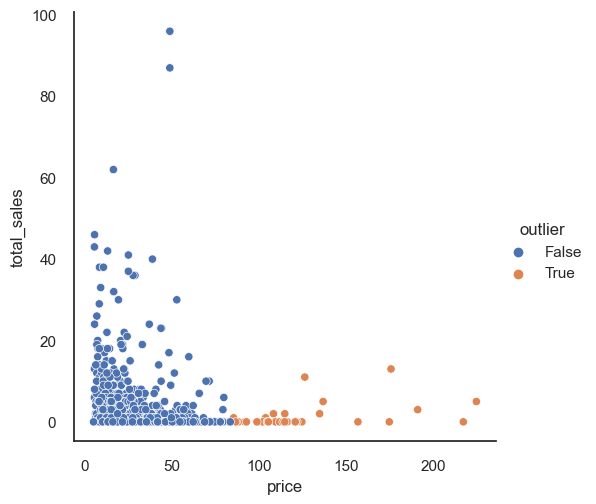

In [52]:
sns.set_theme(style="white")
sns.relplot( data= df_cleaned, x= 'price', y='total_sales', hue= "outlier")
